***

# Рынок заведений общественного питания Москвы

## Загрузим данные и изучим общую информацию

In [44]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [45]:
try:
    data = pd.read_csv('/datasets/moscow_places.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')

In [46]:
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Вывод:**
- Датасет содержит 8406 строк
- Названия столбцов в едином стиле
- Типы столбцов корректные
- Есть пропуски в столбцах *hours, price, avg_bill, middle_coffee_cup* и *seats* 

## Выполним предобработку данных

### Изучим, есть ли дубликаты и найдем пропуски

Проверим есть ли дубликаты в датасете

In [48]:
data.duplicated().sum()

0

Дубликатов нет

Изучим столбец *name*

In [49]:
data['name'].describe()

count     8406
unique    5614
top       Кафе
freq       189
Name: name, dtype: object

In [50]:
data['name'].duplicated().sum()

2792

2792 дубликата. Удалять их не будем, так как это могут быть сетевые заведения

Изучим столбец *category*

In [51]:
data['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Здесь все в порядке

Изучим столбец *address*

In [52]:
data['address'].duplicated().sum()

2653

2653 дубликата. Так же оставим как есть. Несколько заведений могут находиться по одному адресу. Например в торговых центрах

Посмотрим есть ли неявные дубликаты. Для этого приведем столбцы *name* и *address* к нижнему регистру

In [53]:
data['name'] = data['name'].str.lower()
data['address'] = data['address'].str.lower()

In [54]:
data[['name', 'address']].duplicated().sum()

4

4 неявных дубликата

In [55]:
data[data[['name', 'address']].duplicated(keep=False)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
189,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",55.880327,37.530786,3.2,NaN,NaN,NaN,NaN,0,NaN
215,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",55.881438,37.531848,3.2,NaN,NaN,NaN,NaN,0,NaN
1430,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,0,188.0
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0
2211,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",55.810553,37.638161,4.4,NaN,NaN,NaN,NaN,0,150.0
2420,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,1,150.0
3091,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",55.738886,37.411648,4.1,NaN,NaN,NaN,NaN,1,276.0
3109,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0


Удалим их

In [56]:
data = data.drop_duplicates(subset=['name', 'address'], keep='last')
data[['name', 'address']].duplicated().sum()

0

Изучим столбец *district*

In [57]:
data['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

С округами все в порядке

Пропуски в столбцах оставим как есть. Корректно заполнить их мы не сможем, а удаление такого количества строк может повлиять на исследование

### Создадим новые столбцы

Создадим столбец *street* с названиями улиц из столбца с адресом

In [58]:
data['street'] = data['address'].str.split(',').str[1].str.strip()

Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
- логическое значение True — если заведение работает ежедневно и круглосуточно;
- логическое значение False — в противоположном случае.

In [59]:
data['is_24/7'] = data['hours'].fillna('').str.contains('ежедневно, круглосуточно')

In [60]:
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица,False


**Вывод:**
- Провели предобработку данных
- Создали новые столбцы *street* и *is_24/7*

## Анализ данных

### Исследуем количество объектов общественного питания по категориям

In [61]:
category = data.groupby('category').agg(count=pd.NamedAgg(column="category", aggfunc="count")).sort_values(by='count', ascending=False).reset_index()
category

,category,count
0,кафе,2377
1,ресторан,2041
2,кофейня,1413
3,"бар,паб",765
4,пиццерия,633
5,быстрое питание,603
6,столовая,315
7,булочная,255


Text(0.5, 1.0, 'Количество объектов общественного питания по категориям')

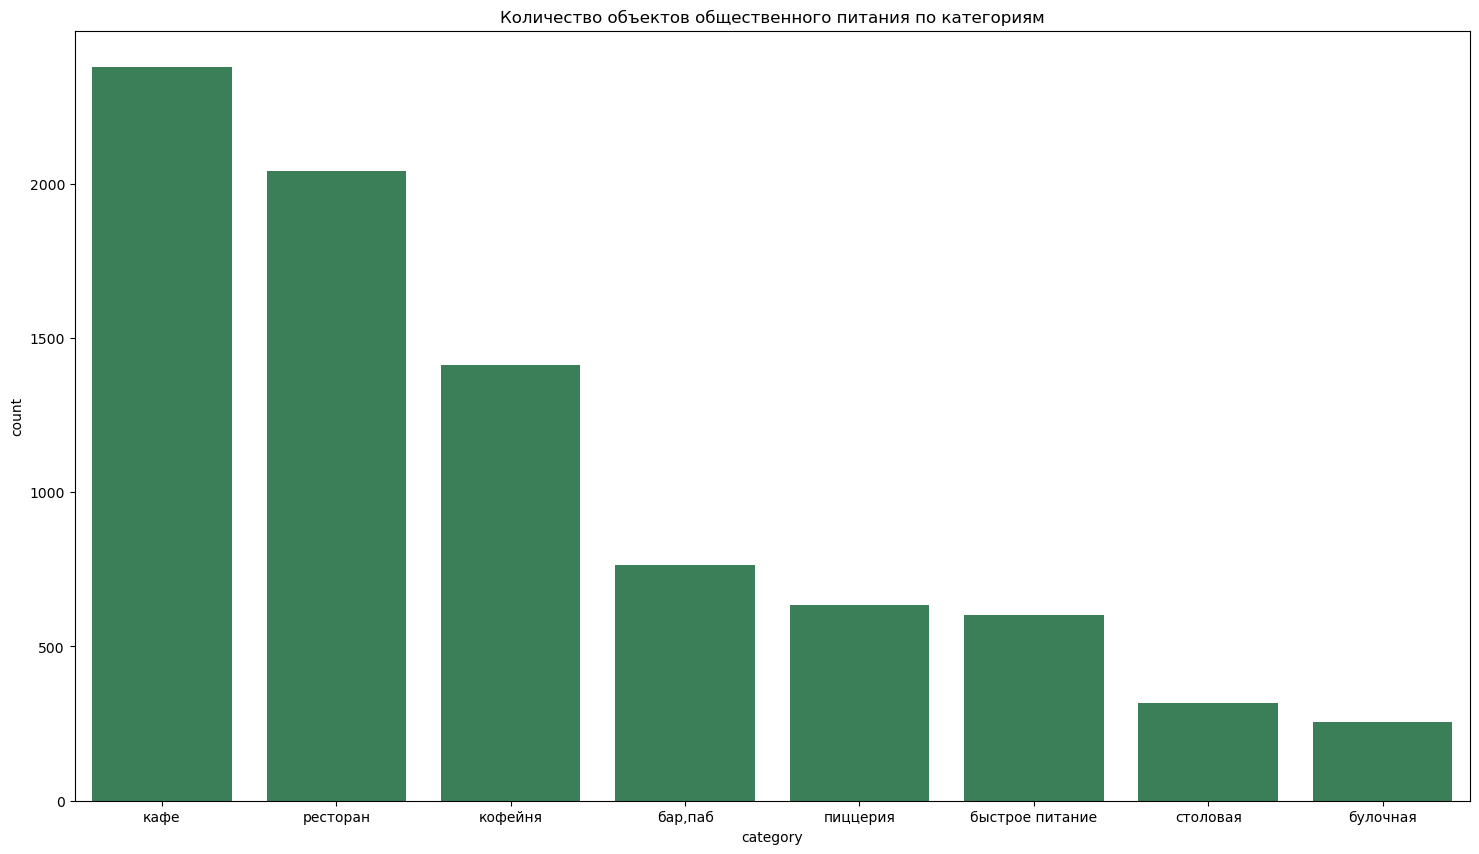

In [62]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='count', data=category, color = 'seagreen')
ax.set_title('Количество объектов общественного питания по категориям')


In [63]:
category['percentage'] = round(category['count'] / category['count'].sum() * 100)
category

,category,count,percentage
0,кафе,2377,28.0
1,ресторан,2041,24.0
2,кофейня,1413,17.0
3,"бар,паб",765,9.0
4,пиццерия,633,8.0
5,быстрое питание,603,7.0
6,столовая,315,4.0
7,булочная,255,3.0


Больше всех кафе, меньше всех булочных

### Исследуем количество посадочных мест в местах по категориям

In [64]:
category_seats = data.groupby('category').agg(median=pd.NamedAgg(column="seats", aggfunc="median")).sort_values(by='median', ascending=False).reset_index()
category_seats

,category,median
0,ресторан,86.0
1,"бар,паб",82.5
2,кофейня,80.0
3,столовая,75.5
4,быстрое питание,65.0
5,кафе,60.0
6,пиццерия,55.0
7,булочная,50.0


Text(0, 0.5, 'Количество посадочных мест')

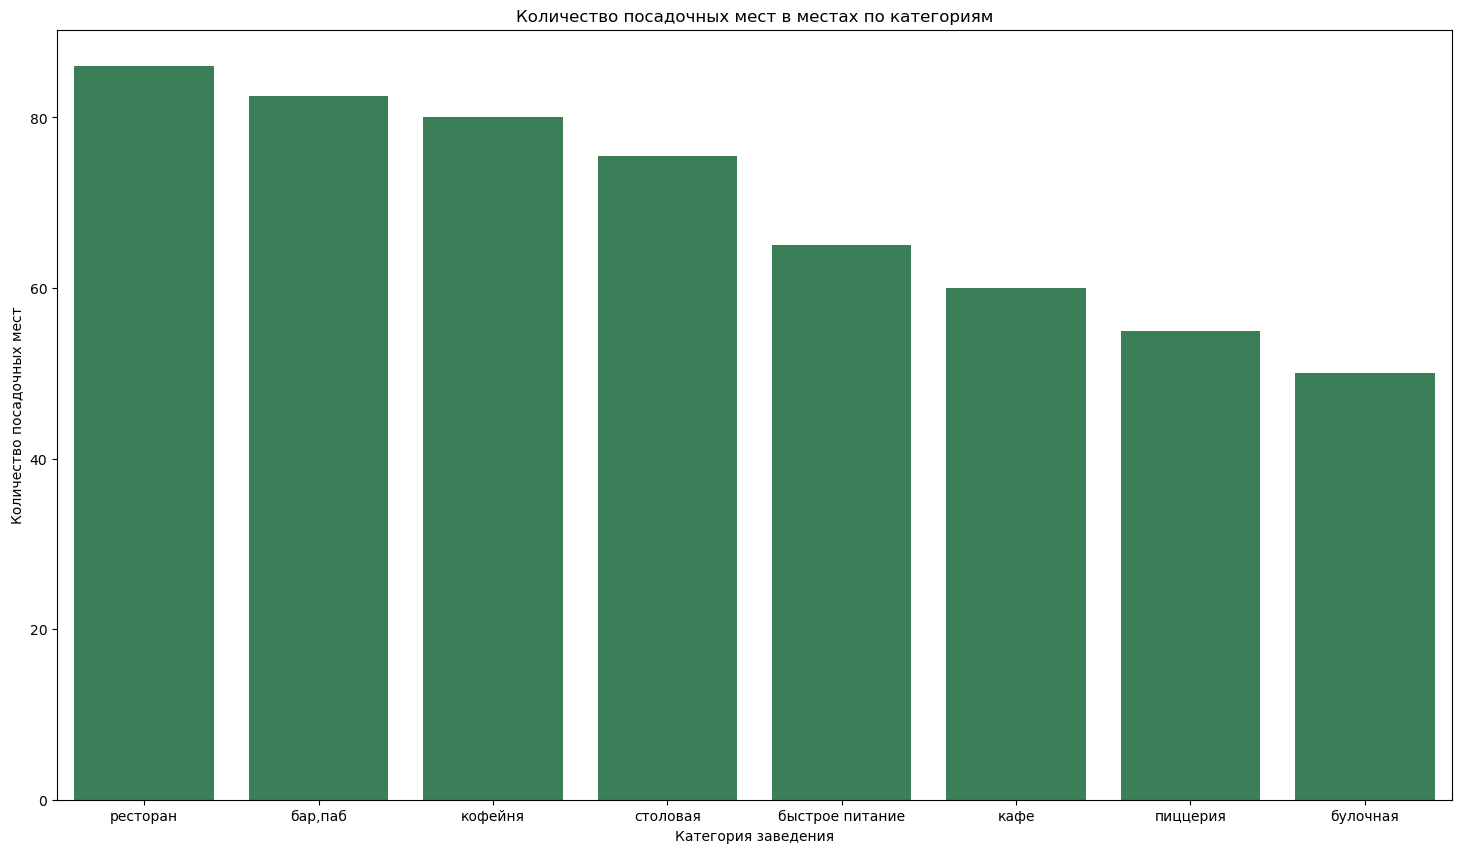

In [65]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='median', data=category_seats, color='seagreen')
ax.set_title('Количество посадочных мест в местах по категориям')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество посадочных мест')

В среднем в ресторанах больше всего посадочных мест, меньше всего - в булочных 

### Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете

In [66]:
chain = data.groupby('chain').agg(count=pd.NamedAgg(column="chain", aggfunc="count")).reset_index()
chain

,chain,count
0,0,5198
1,1,3204


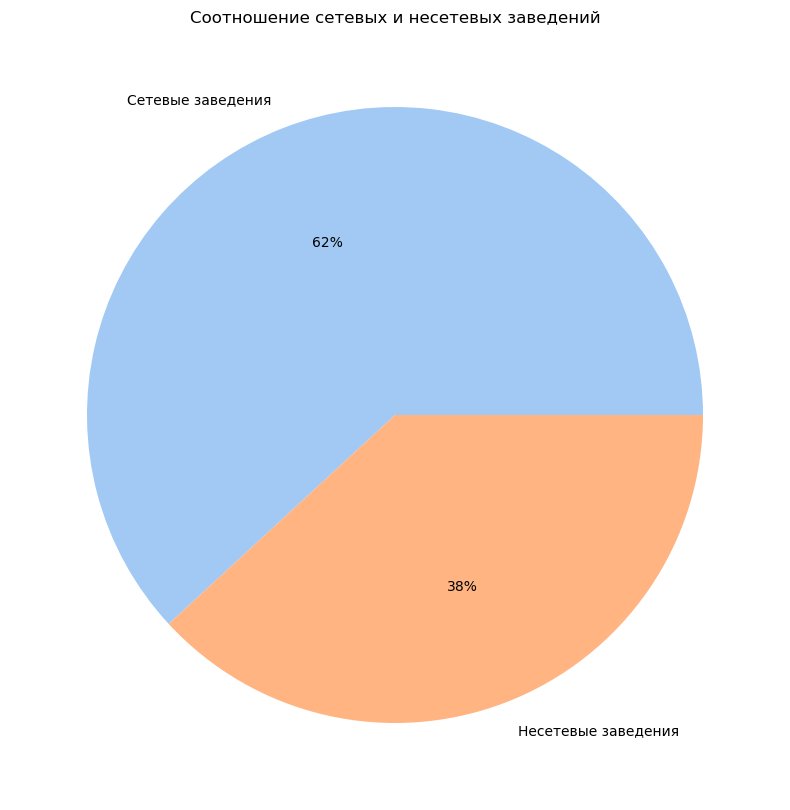

In [67]:
plt.figure(figsize=(18, 10))
colors = sns.color_palette('pastel')[ 0:5 ]
labels = ['Сетевые заведения', 'Несетевые заведения']
plt.title('Cоотношение сетевых и несетевых заведений')
plt.pie(chain['count'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Сетевых заведений больше, чем несетевых

### Исследуем какие категории заведений чаще являются сетевыми

In [68]:
category_chain = data.groupby('category').agg(count=pd.NamedAgg(column="category", aggfunc="count"), chain=pd.NamedAgg(column="chain", aggfunc="sum"))
category_chain['chain_%'] = round(category_chain['chain'] / category_chain['count'] * 100)
category_chain = category_chain.sort_values(by='chain_%', ascending=False).reset_index()
category_chain

,category,count,chain,chain_%
0,булочная,255,156,61.0
1,пиццерия,633,330,52.0
2,кофейня,1413,720,51.0
3,быстрое питание,603,232,38.0
4,ресторан,2041,730,36.0
5,кафе,2377,779,33.0
6,столовая,315,88,28.0
7,"бар,паб",765,169,22.0


Text(0, 0.5, 'Количество посадочных мест')

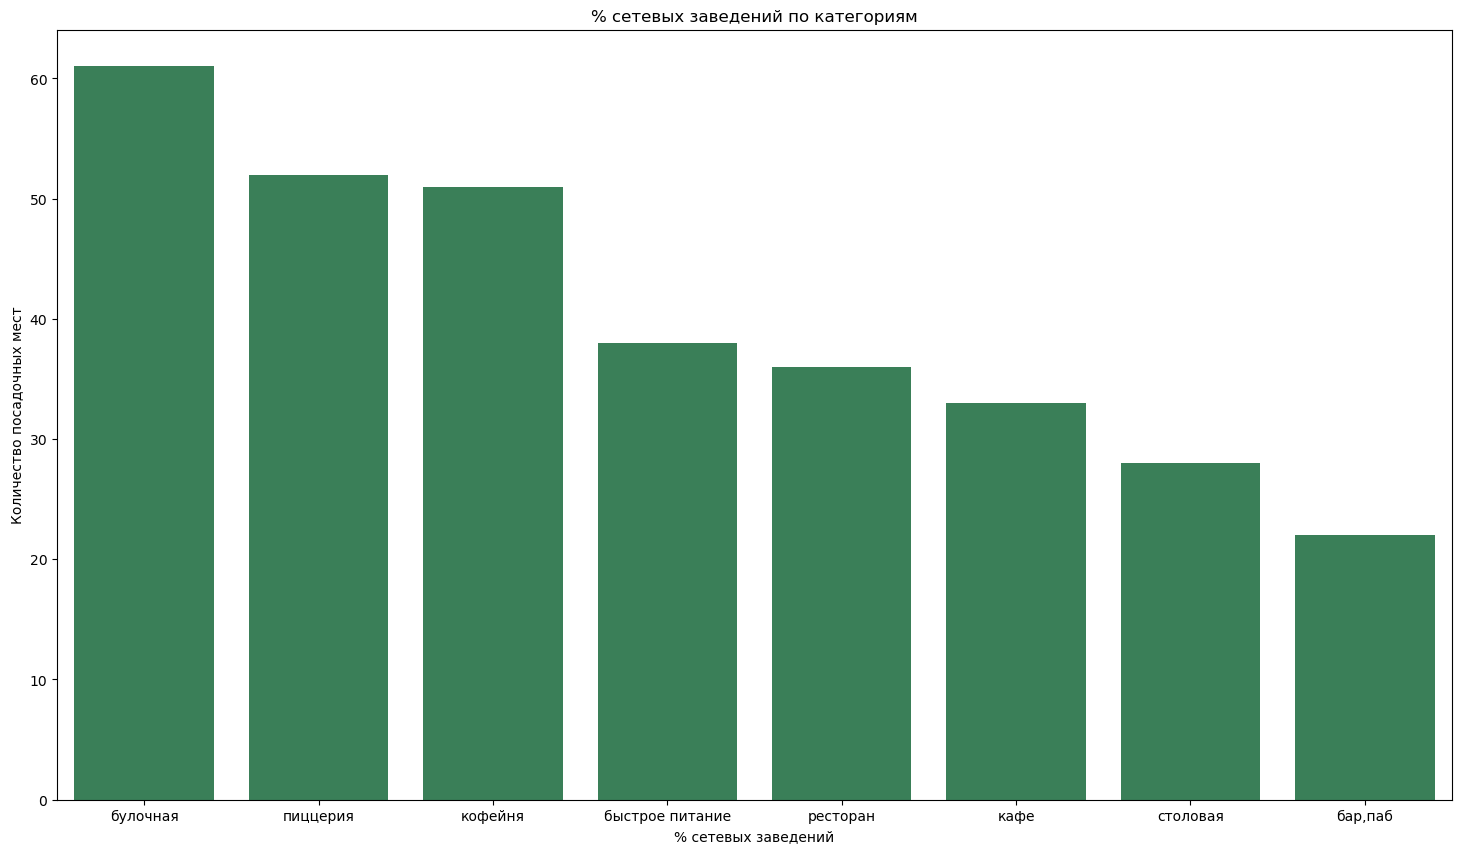

In [69]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='chain_%', data=category_chain, color='seagreen')
ax.set_title('% сетевых заведений по категориям')
ax.set_xlabel('% сетевых заведений')
ax.set_ylabel('Количество посадочных мест')

Чаще всего сетевыми являются булочные, реже всего - бар, паб

### Найдем топ-15 популярных сетей в Москве. 

In [70]:
name = data.groupby('name').agg(count=pd.NamedAgg(column="name", aggfunc="count")).sort_values(by='count', ascending=False).reset_index()
name = name.head(15)
name

,name,count
0,кафе,188
1,шоколадница,120
2,домино'с пицца,77
3,додо пицца,74
4,one price coffee,72
5,яндекс лавка,69
6,cofix,65
7,prime,50
8,хинкальная,44
9,шаурма,43


Text(0, 0.5, 'Название сети')

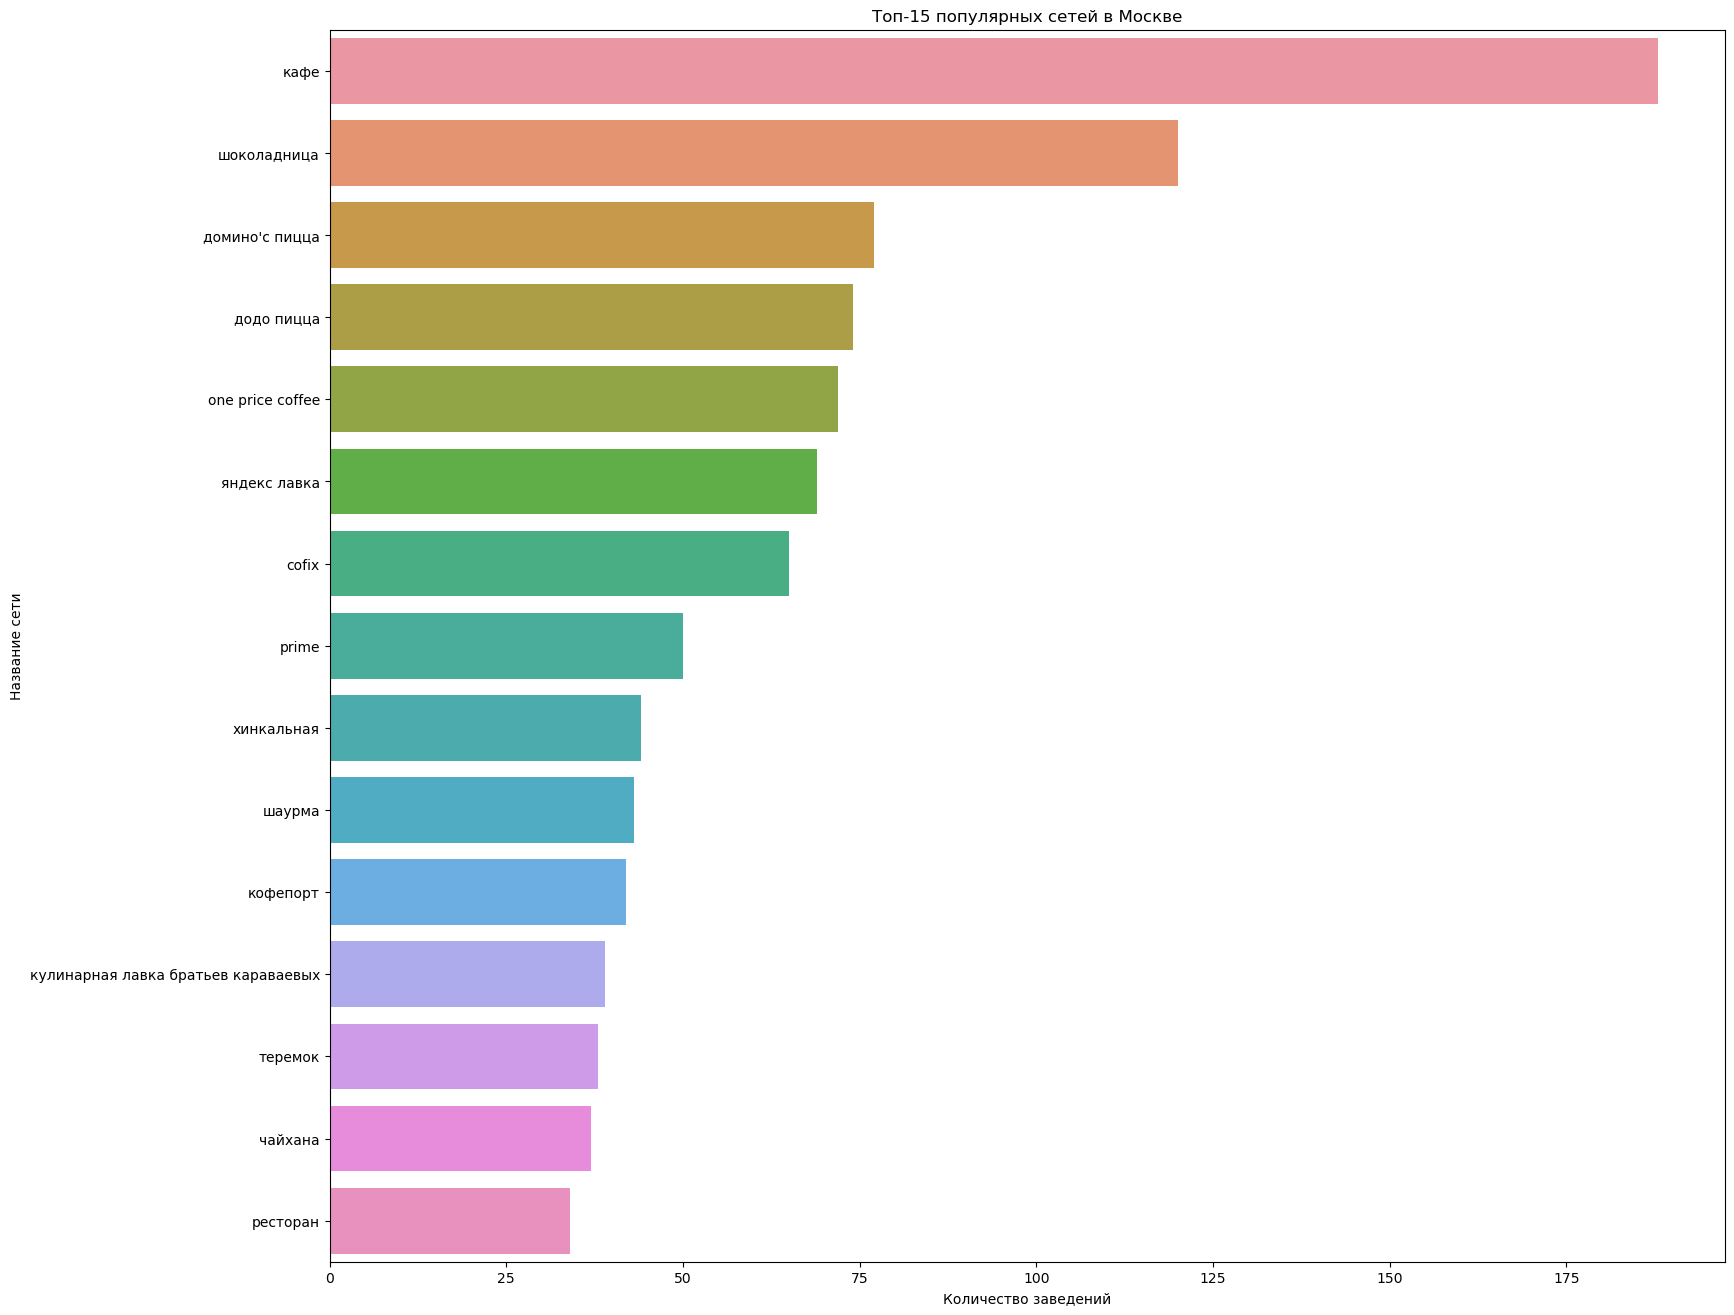

In [71]:
plt.figure(figsize=(18, 16))
ax = sns.barplot(x='count', y='name', data=name)
ax.set_title('Топ-15 популярных сетей в Москве')
ax.set_xlabel('Количество заведений')
ax.set_ylabel('Название сети')

Самое популярное заведение - кафе

### Исследуем какие административные районы Москвы присутствуют в датасете и отобразим количество заведений

In [72]:
data['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [73]:
district = pd.pivot_table(data, values='name', index=["category"], columns =["district"], aggfunc='count').reset_index()

district

district,category,Восточный административный округ,Западный административный округ,Северный административный округ,Северо-Восточный административный округ,Северо-Западный административный округ,Центральный административный округ,Юго-Восточный административный округ,Юго-Западный административный округ,Южный административный округ
0,"бар,паб",53,50,68,63,23,364,38,38,68
1,булочная,25,36,39,28,12,50,13,27,25
2,быстрое питание,71,62,58,82,30,87,67,61,85
3,кафе,272,239,234,269,115,464,282,238,264
4,кофейня,105,150,193,159,62,428,89,96,131
5,пиццерия,72,71,77,68,40,113,55,64,73
6,ресторан,160,218,188,181,109,670,145,168,202
7,столовая,40,24,41,40,18,66,25,17,44


Text(0, 0.5, 'Количество заведений')

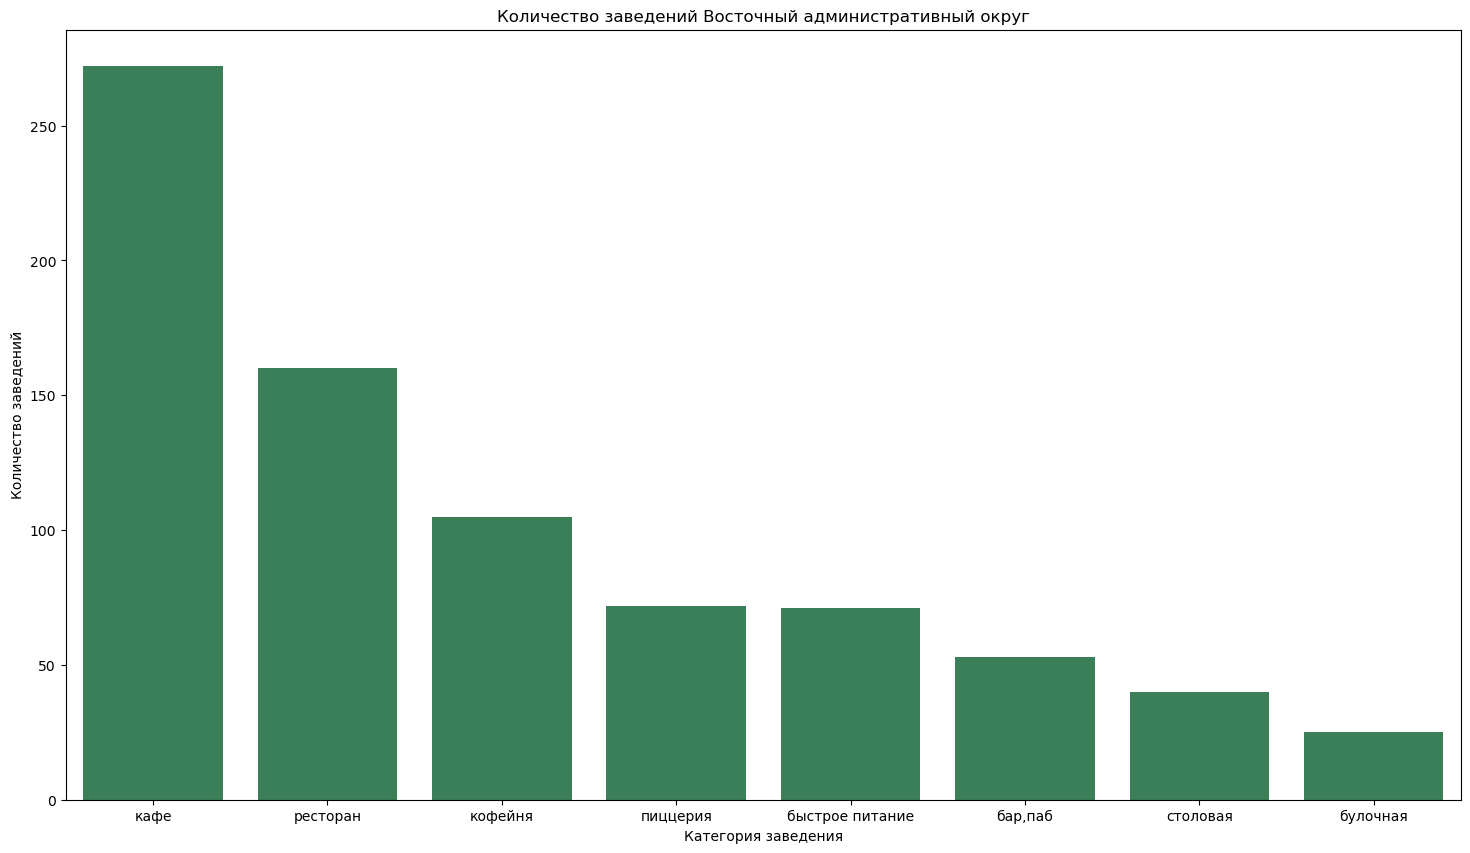

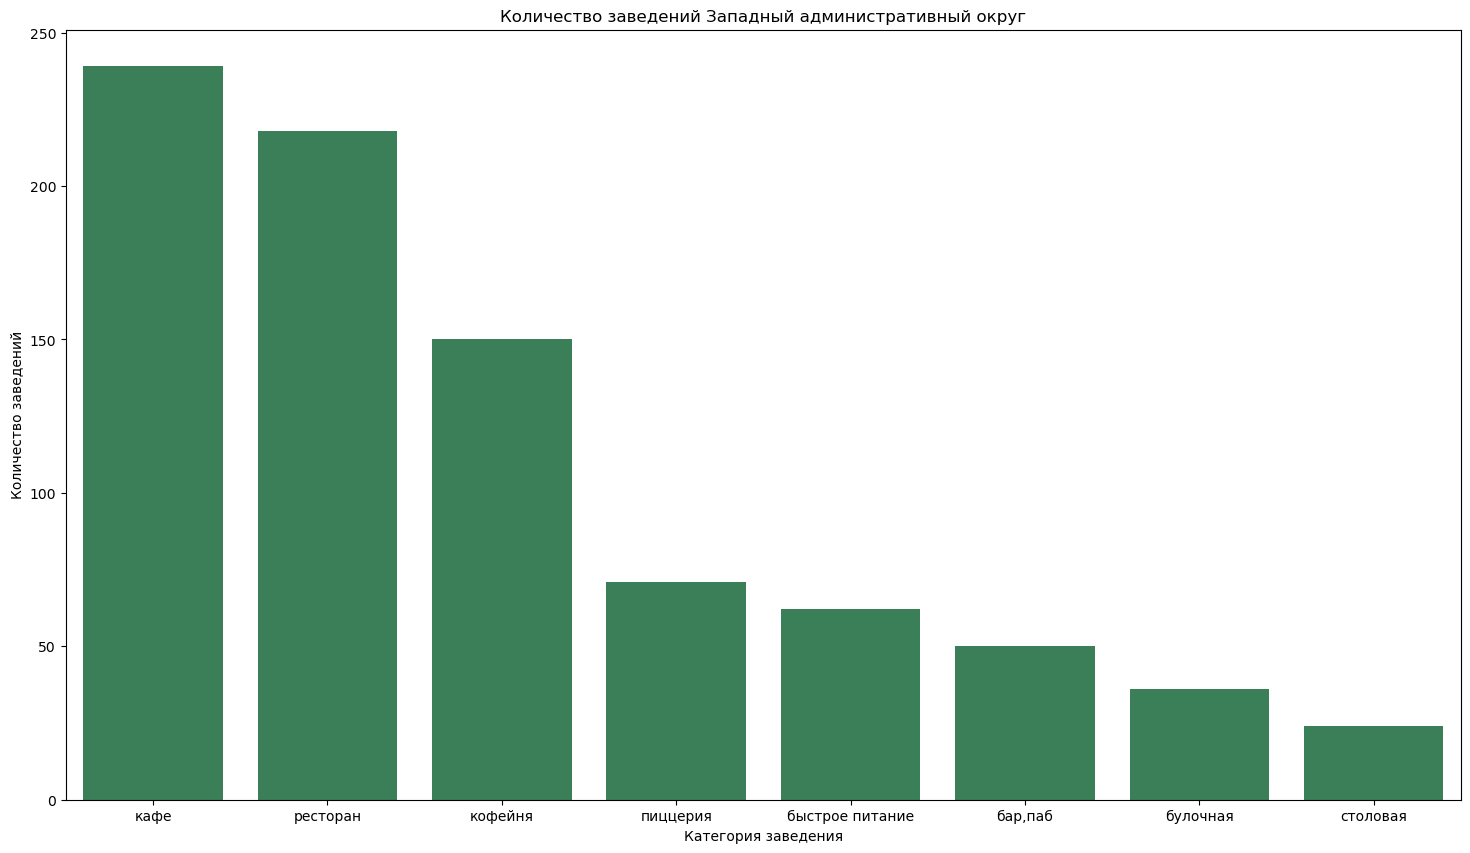

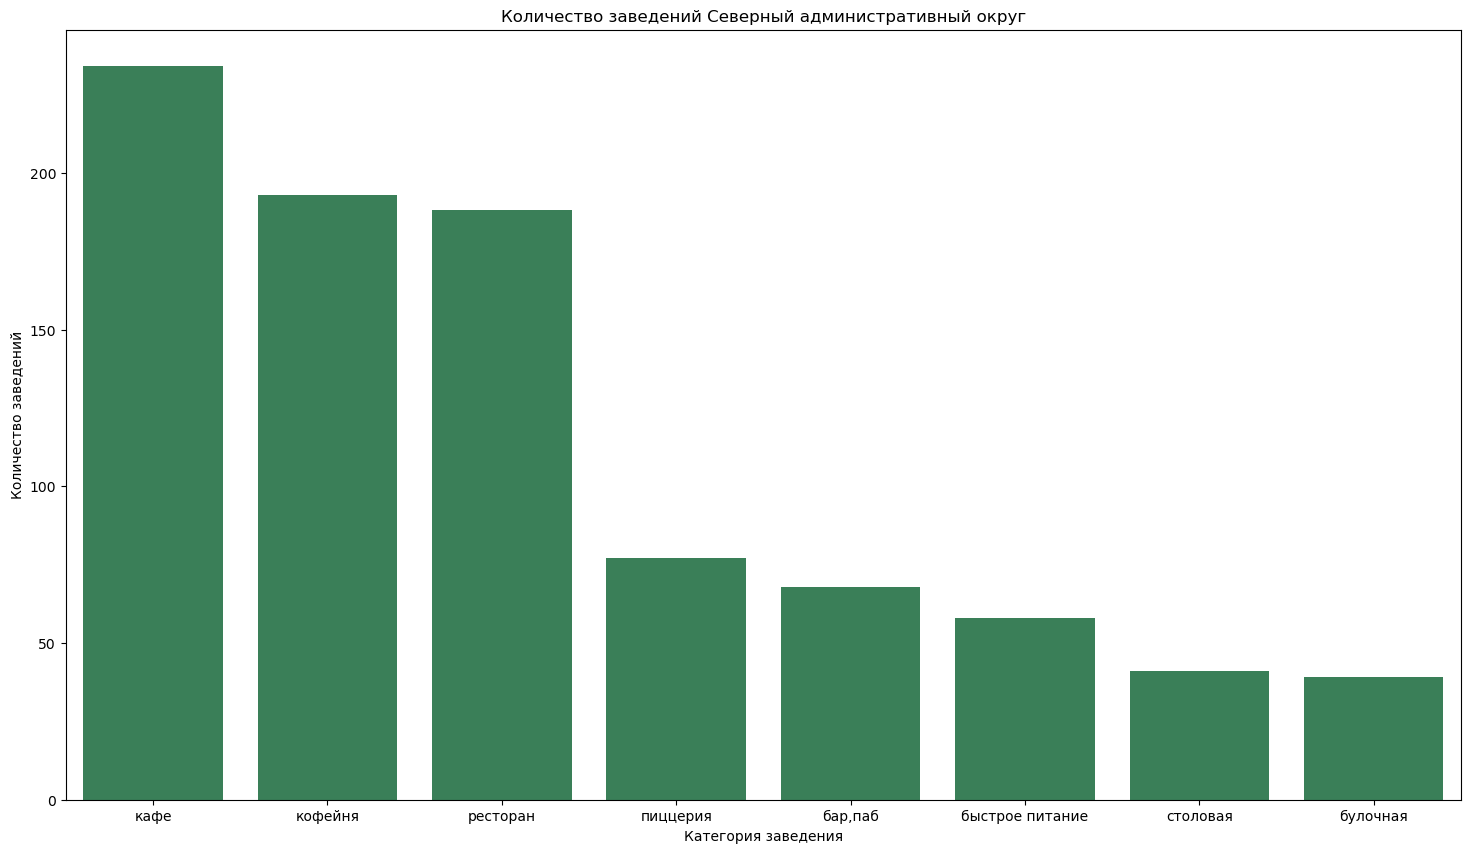

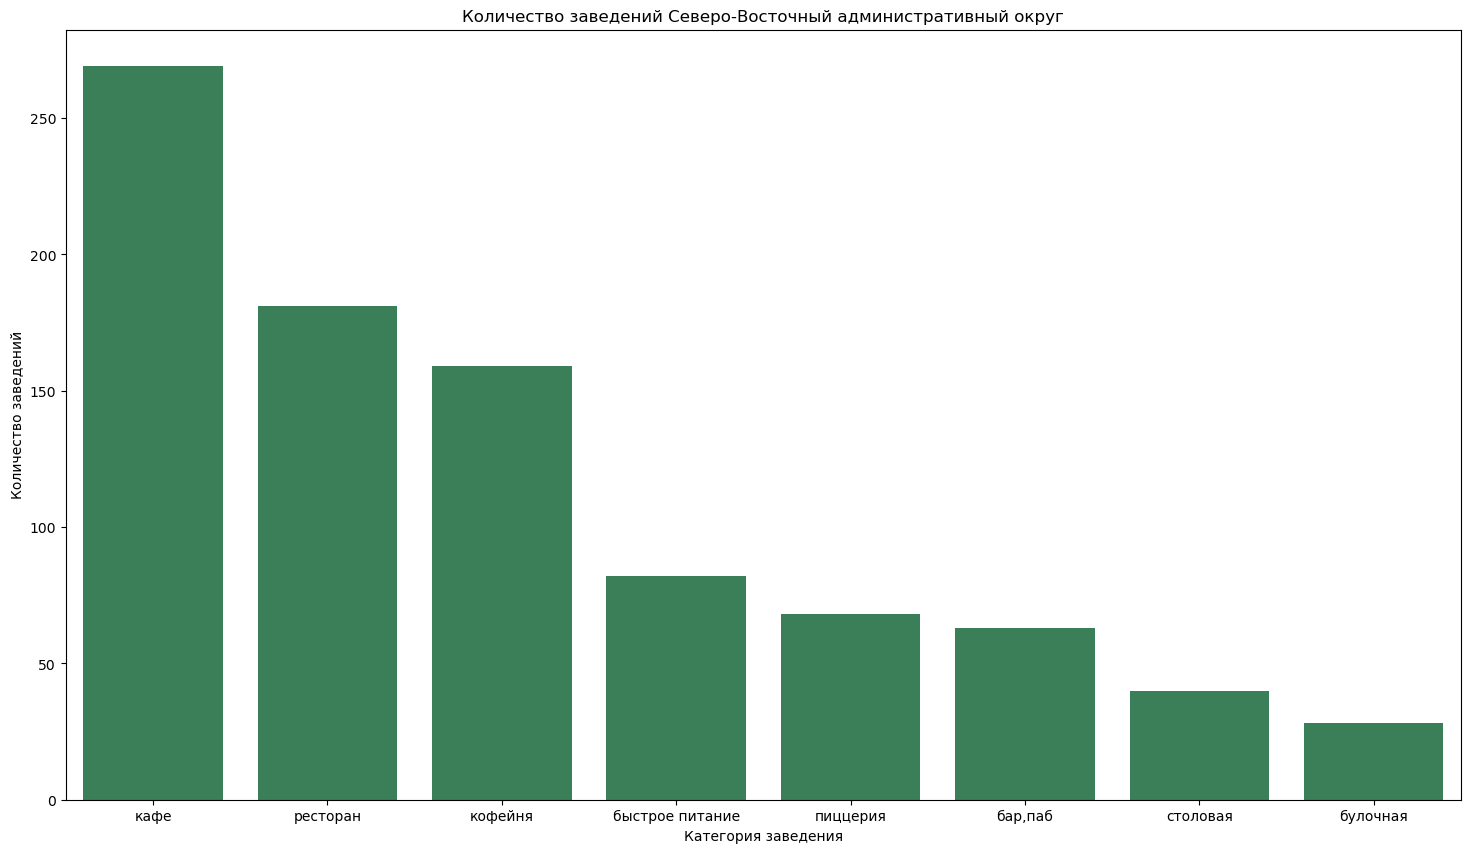

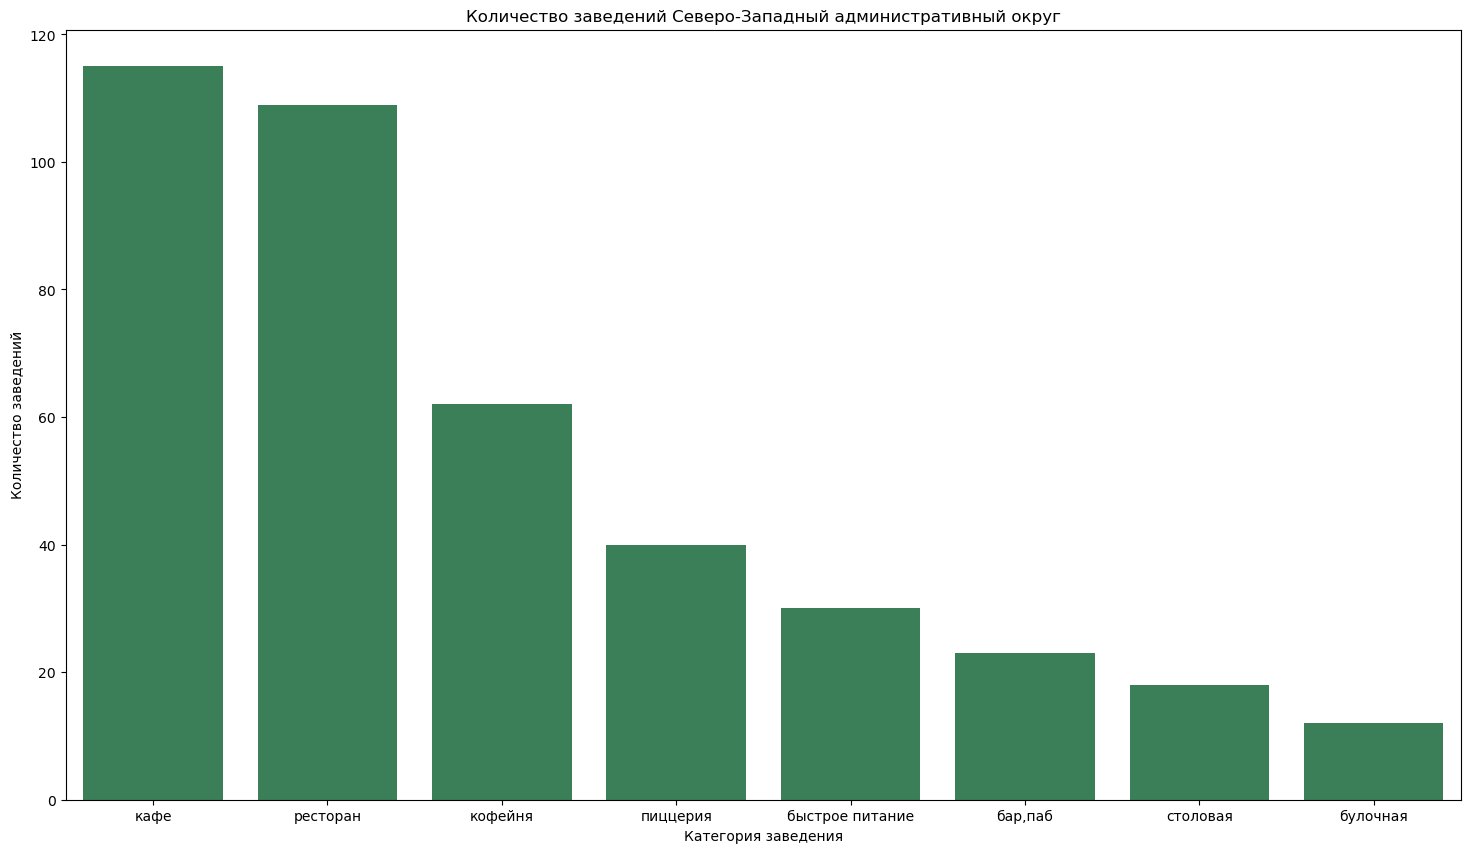

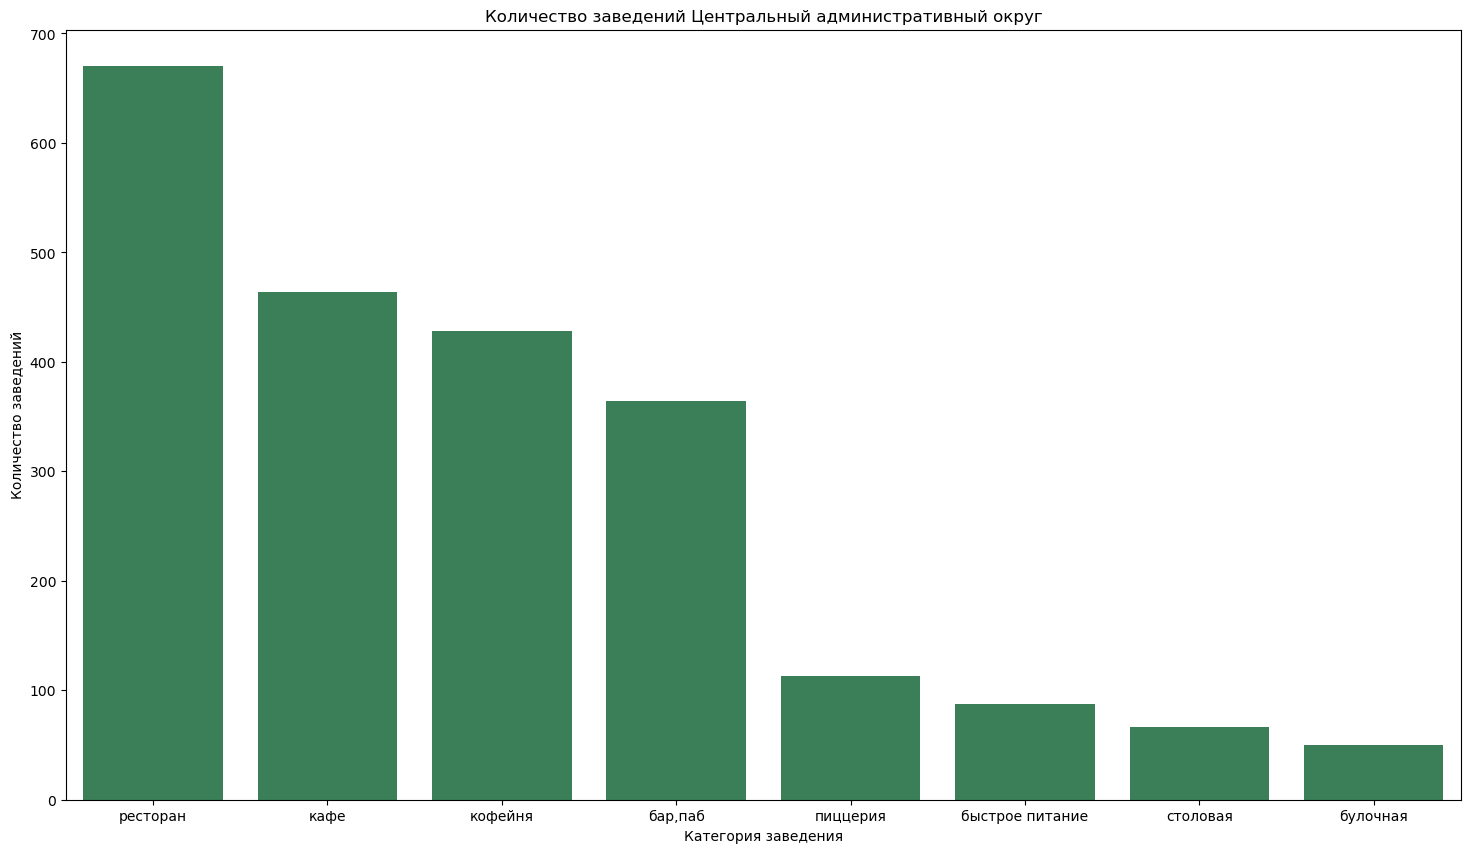

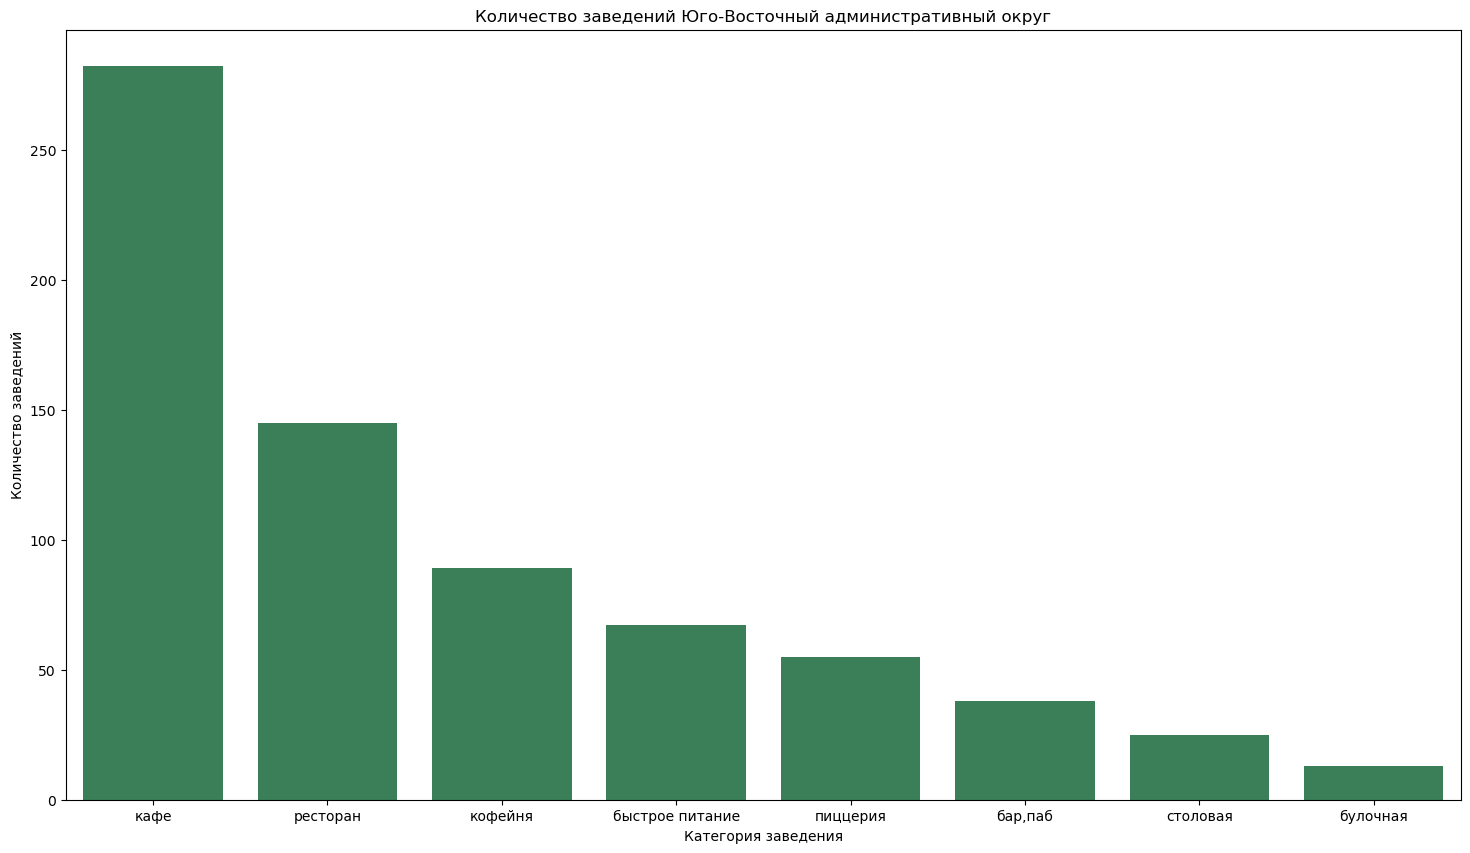

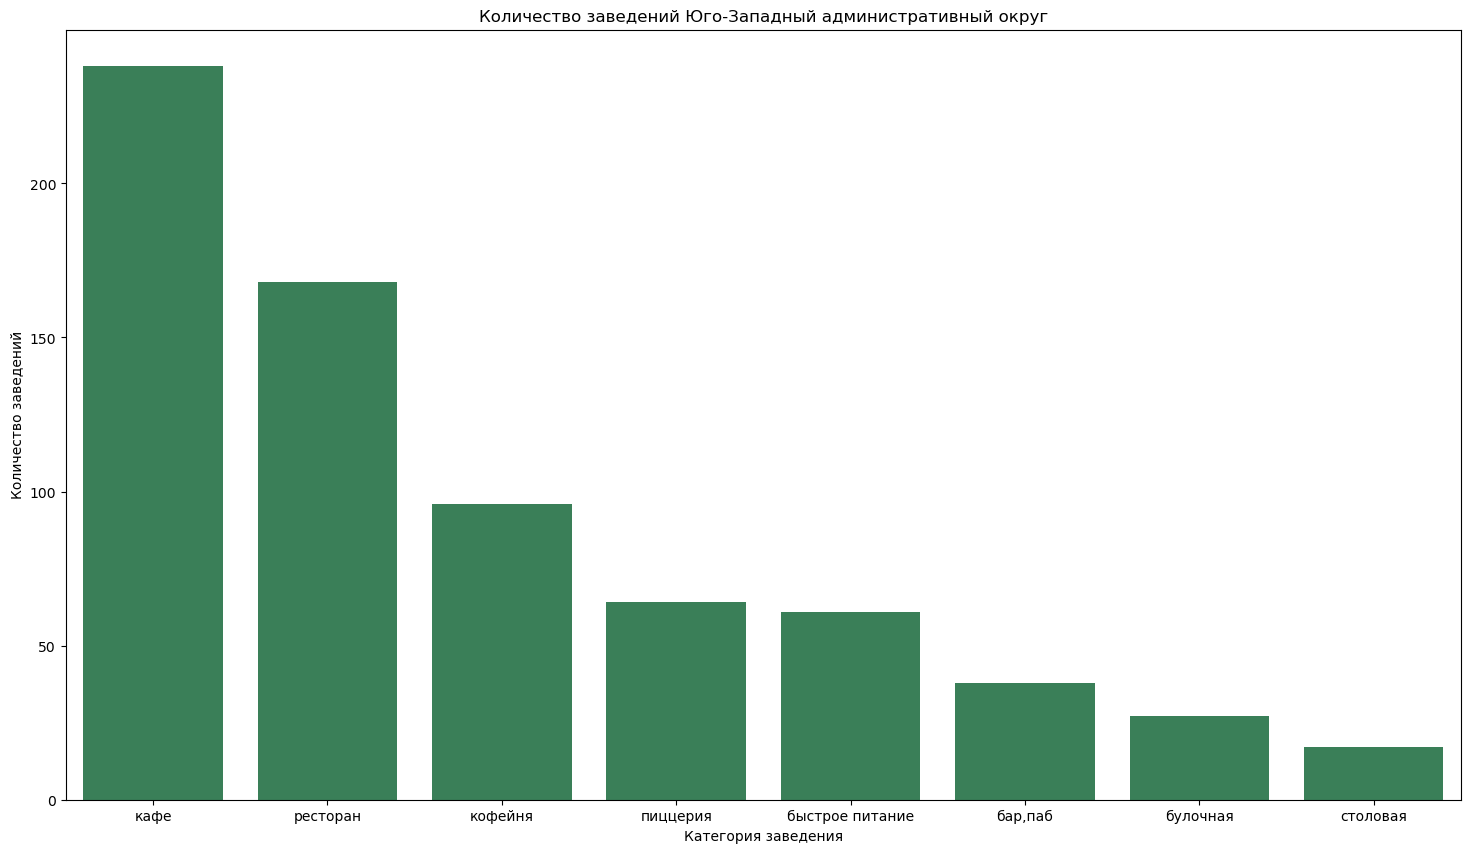

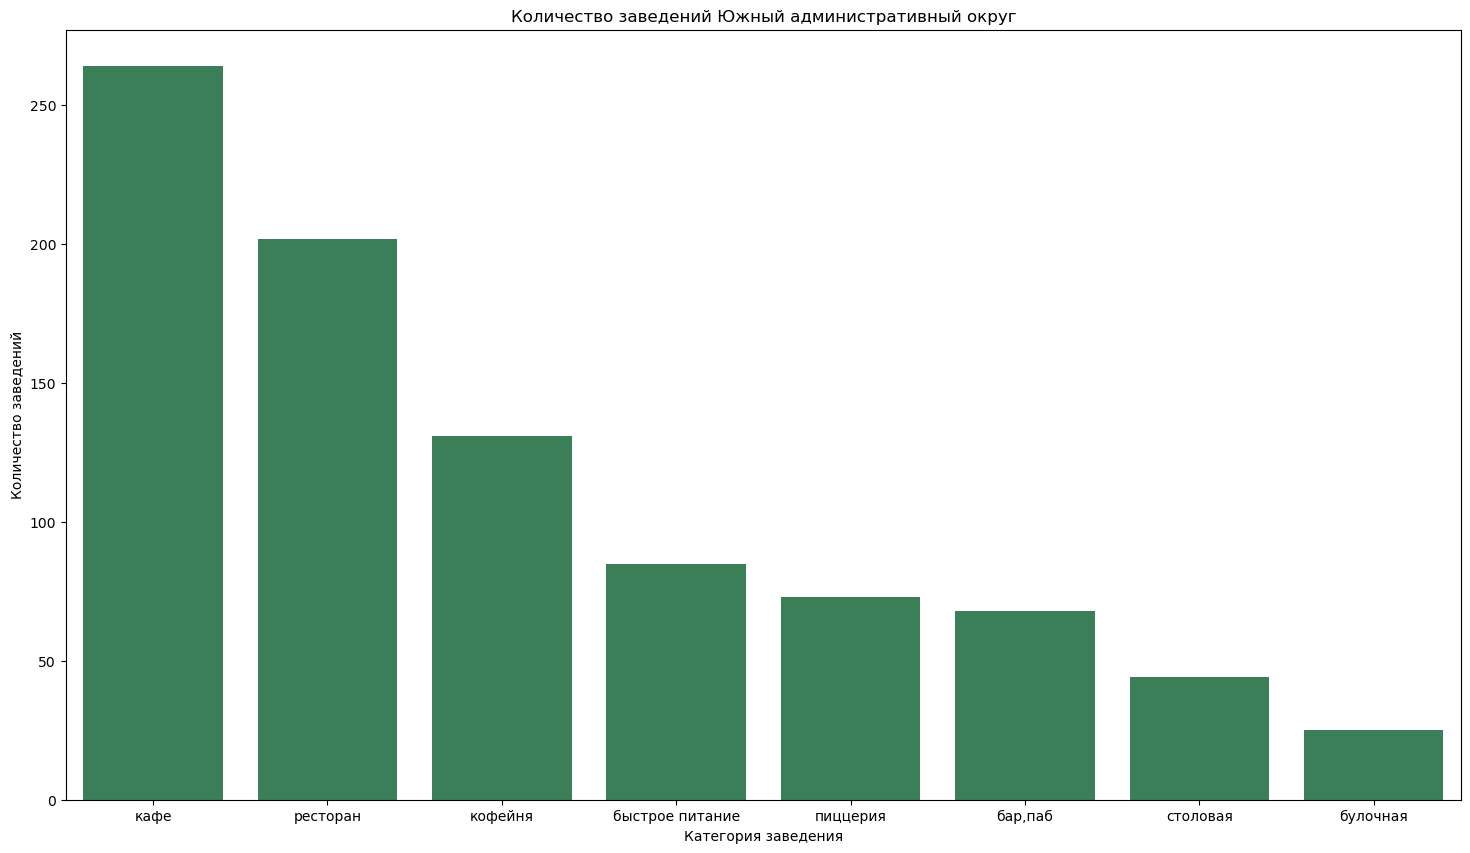

In [74]:
district = district.sort_values(by='Восточный административный округ', ascending=False)
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='Восточный административный округ', data=district, color='seagreen')
ax.set_title('Количество заведений Восточный административный округ')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')

district = district.sort_values(by='Западный административный округ', ascending=False)
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='Западный административный округ', data=district, color='seagreen')
ax.set_title('Количество заведений Западный административный округ')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')

district = district.sort_values(by='Северный административный округ', ascending=False)
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='Северный административный округ', data=district, color='seagreen')
ax.set_title('Количество заведений Северный административный округ')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')

district = district.sort_values(by='Северо-Восточный административный округ', ascending=False)
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='Северо-Восточный административный округ', data=district, color='seagreen')
ax.set_title('Количество заведений Северо-Восточный административный округ')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')

district = district.sort_values(by='Северо-Западный административный округ', ascending=False)
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='Северо-Западный административный округ', data=district, color='seagreen')
ax.set_title('Количество заведений Северо-Западный административный округ')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')

district = district.sort_values(by='Центральный административный округ', ascending=False)
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='Центральный административный округ', data=district, color='seagreen')
ax.set_title('Количество заведений Центральный административный округ')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')

district = district.sort_values(by='Юго-Восточный административный округ', ascending=False)
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='Юго-Восточный административный округ', data=district, color='seagreen')
ax.set_title('Количество заведений Юго-Восточный административный округ')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')

district = district.sort_values(by='Юго-Западный административный округ', ascending=False)
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='Юго-Западный административный округ', data=district, color='seagreen')
ax.set_title('Количество заведений Юго-Западный административный округ')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')

district = district.sort_values(by='Южный административный округ', ascending=False)
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='Южный административный округ', data=district, color='seagreen')
ax.set_title('Количество заведений Южный административный округ')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Количество заведений')

Больше всего заведений в Центральном административном округе. Во всех округах больше всего кафе и ресторанов

### Визуализируем распределение средних рейтингов по категориям заведений

In [75]:
rating = data.groupby('category').agg(rating=pd.NamedAgg(column="rating", aggfunc="mean")).sort_values(by='rating', ascending=False).reset_index()
rating['rating'] = round(rating['rating'], 2)
rating

,category,rating
0,"бар,паб",4.39
1,пиццерия,4.30
2,ресторан,4.29
3,кофейня,4.28
4,булочная,4.27
5,столовая,4.21
6,кафе,4.12
7,быстрое питание,4.05


In [76]:
round(rating['rating'].mean(), 1)

4.2

Text(0, 0.5, 'Рейтинг')

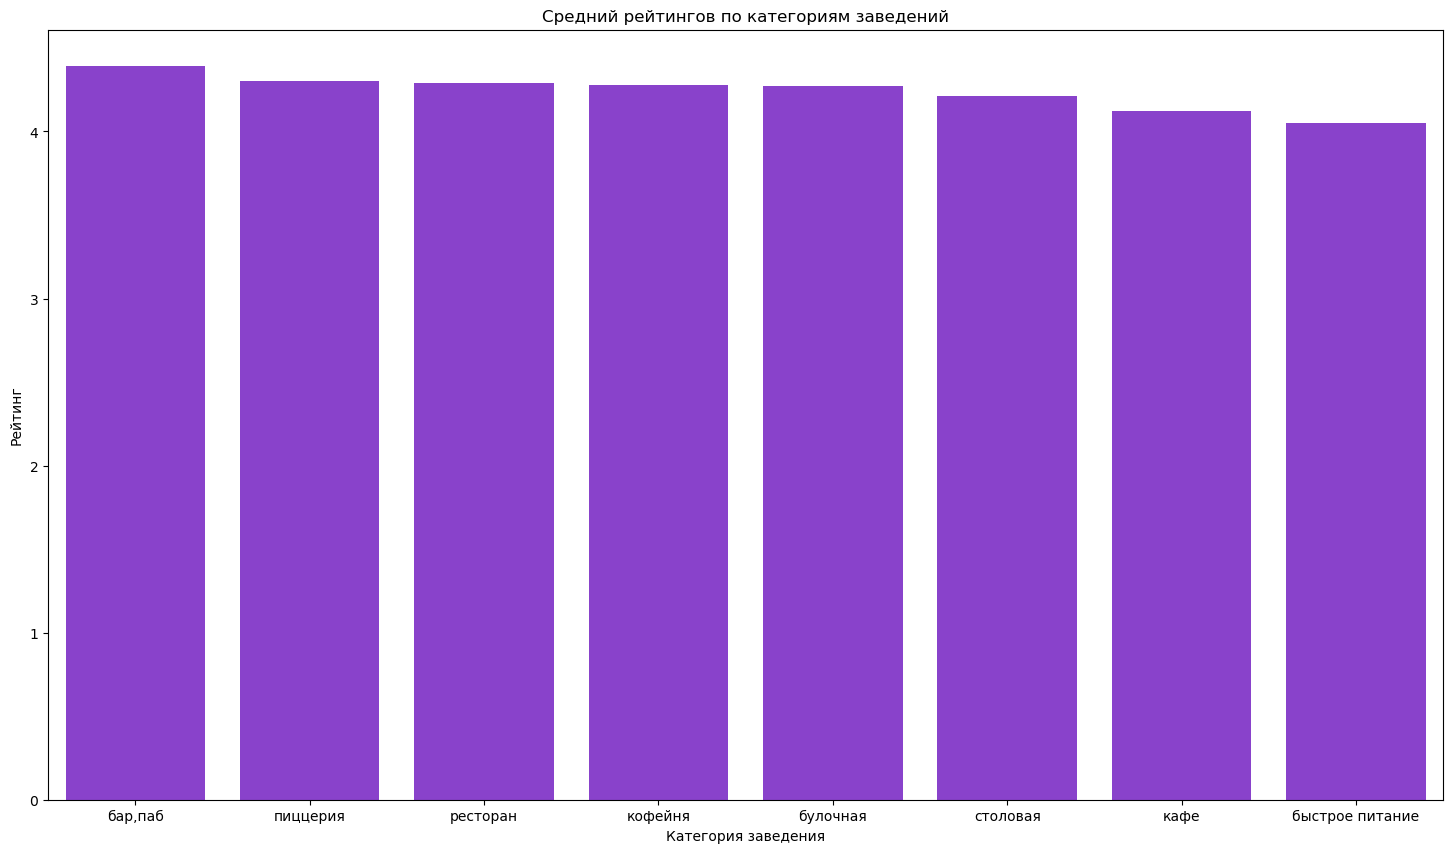

In [77]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='category', y='rating', data=rating, color='blueviolet')
ax.set_title('Cредний рейтингов по категориям заведений')
ax.set_xlabel('Категория заведения')
ax.set_ylabel('Рейтинг')

Рейтинги практически не отличаются

### Визуализируем распределение средних рейтингов заведений каждого района

In [78]:
rating_district = data.groupby('district').agg(rating=pd.NamedAgg(column="rating", aggfunc="mean")).sort_values(by='rating', ascending=False).reset_index()
rating_district['rating'] = round(rating_district['rating'], 2)
rating_district

,district,rating
0,Центральный административный округ,4.38
1,Северный административный округ,4.24
2,Северо-Западный административный округ,4.21
3,Южный административный округ,4.18
4,Западный административный округ,4.18
5,Восточный административный округ,4.17
6,Юго-Западный административный округ,4.17
7,Северо-Восточный административный округ,4.15
8,Юго-Восточный административный округ,4.10


In [79]:
round(rating_district['rating'].mean(), 1)

4.2

В Центральном административном округе рейтинги чуть выше

### Найдем топ-15 улиц по количеству заведений

In [80]:
street = data.groupby('street').agg(count=pd.NamedAgg(column="name", aggfunc="count")).sort_values(by='count', ascending=False).reset_index()
street_15 = street.head(15)
street_15

,street,count
0,проспект мира,183
1,профсоюзная улица,122
2,проспект вернадского,108
3,ленинский проспект,107
4,ленинградский проспект,95
5,дмитровское шоссе,88
6,каширское шоссе,77
7,варшавское шоссе,76
8,ленинградское шоссе,70
9,мкад,65


Text(0, 0.5, 'Название улицы')

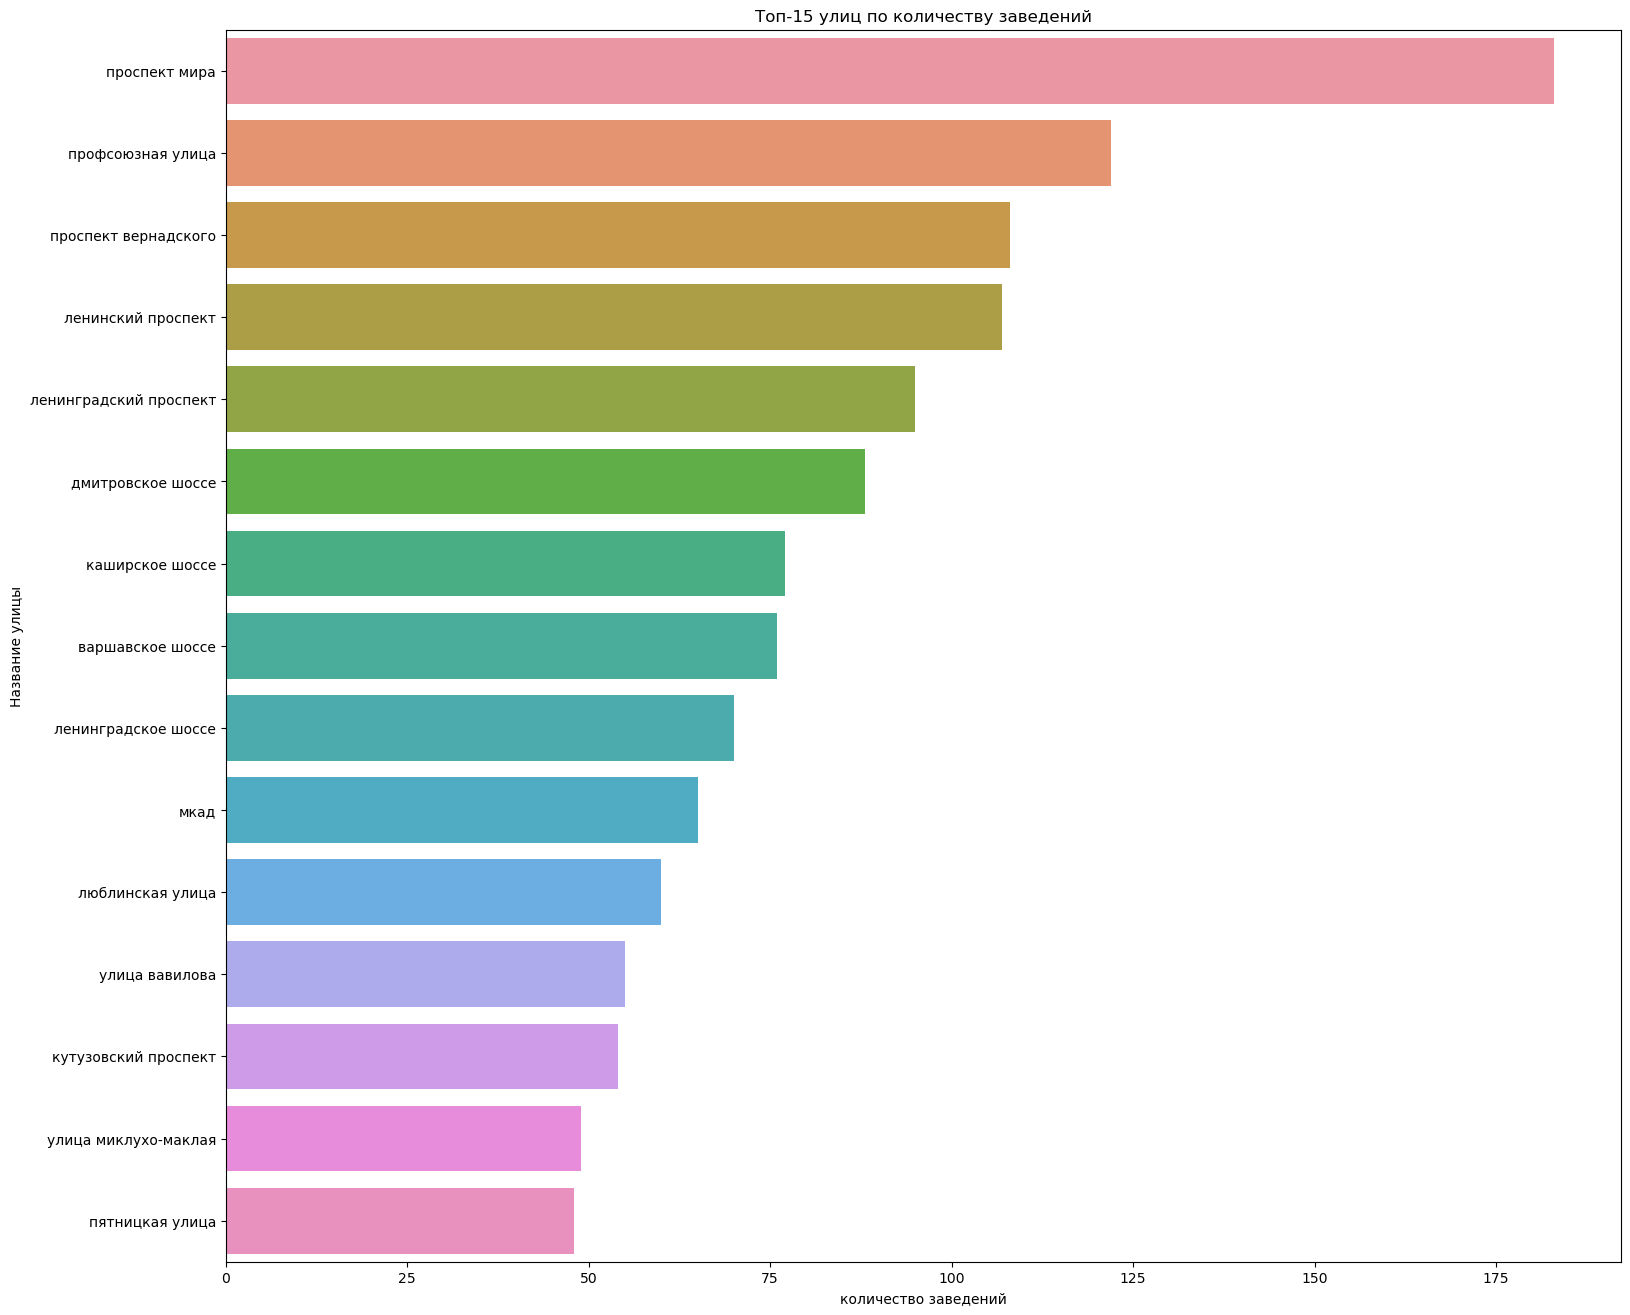

In [81]:
plt.figure(figsize=(18, 16))
ax = sns.barplot(x='count', y='street', data=street_15)
ax.set_title('Топ-15 улиц по количеству заведений')
ax.set_xlabel('количество заведений')
ax.set_ylabel('Название улицы')

Больше всего заведений на Проспекте мира

### Найдем улицы, на которых находится только один объект общепита

In [82]:
street[street['count'] == 1].count()

street    457
count     457
dtype: int64

458 улиц с одним объектом общепита

### Посчитаем средний чек для каждого  района.

In [83]:
middle_avg_bill = data.groupby('district').agg(median=pd.NamedAgg(column="middle_avg_bill", aggfunc="median")).sort_values(by='median', ascending=False).reset_index()
middle_avg_bill

,district,median
0,Западный административный округ,1000.0
1,Центральный административный округ,1000.0
2,Северо-Западный административный округ,700.0
3,Северный административный округ,650.0
4,Юго-Западный административный округ,600.0
5,Восточный административный округ,575.0
6,Северо-Восточный административный округ,500.0
7,Южный административный округ,500.0
8,Юго-Восточный административный округ,450.0


Самый большой средний чек в Центральном и Западном округах

**Вывод:**
- Больше всего заведений в категории кафе - 2378 или 28%
- Посадочных мест больше всего в ресторанах - в среднем 86
- Чаще заведения являются сетевыми - 62%
- Самая популярная сеть - Кафе
- Больше всего заведений в Центральном административном округе - 2242
- Средний рейтинг по категориям не сильно отличается и составляет - 4.3
- По районам рейтинг также примерно равен
- Больше всего заведений на проспекте Мира - 184
- Улиц с одним объектом общепита - 458
- Самый большой средний чек в Центральном и Западном округах - 1000

## Детализируем исследование: открытие кофейни

### Посмотрим сколько всего кофеен в датасете

In [84]:
category[category['category'] == 'кофейня']

,category,count,percentage
2,кофейня,1413,17.0


1413 кофеен

In [85]:
coffee_house_dist = district[district['category'] == 'кофейня']
coffee_house_dist

district,category,Восточный административный округ,Западный административный округ,Северный административный округ,Северо-Восточный административный округ,Северо-Западный административный округ,Центральный административный округ,Юго-Восточный административный округ,Юго-Западный административный округ,Южный административный округ
4,кофейня,105,150,193,159,62,428,89,96,131


Больше всего кофеен в Центральном административном округе - 428

### Посмотрим есть ли круглосуточные кофейни

In [86]:
coffee_house[coffee_house['is_24/7'] == True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 200 to 7923
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               59 non-null     object 
 1   category           59 non-null     object 
 2   address            59 non-null     object 
 3   district           59 non-null     object 
 4   hours              59 non-null     object 
 5   lat                59 non-null     float64
 6   lng                59 non-null     float64
 7   rating             59 non-null     float64
 8   price              25 non-null     object 
 9   avg_bill           28 non-null     object 
 10  middle_avg_bill    13 non-null     float64
 11  middle_coffee_cup  15 non-null     float64
 12  chain              59 non-null     int64  
 13  seats              37 non-null     float64
 14  street             59 non-null     object 
 15  is_24/7            59 non-null     bool   
dtypes: bool(1), float64(6), 

59 круглосуточных кофеен

### Посмотрим какие у кофеен рейтинги, как они распределяются по районам

In [87]:
rating_coffee_house = coffee_house.groupby('district').agg(rating=pd.NamedAgg(column="rating", aggfunc="mean")).sort_values(by='rating', ascending=False).reset_index()
rating_coffee_house['rating'] = round(rating_coffee_house['rating'], 2)
rating_coffee_house

,district,rating
0,Центральный административный округ,4.34
1,Северо-Западный административный округ,4.33
2,Северный административный округ,4.29
3,Юго-Западный административный округ,4.28
4,Восточный административный округ,4.28
5,Южный административный округ,4.23
6,Юго-Восточный административный округ,4.23
7,Северо-Восточный административный округ,4.22
8,Западный административный округ,4.20


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Центральный административный округ'),
  Text(1, 0, 'Северо-Западный административный округ'),
  Text(2, 0, 'Северный административный округ'),
  Text(3, 0, 'Юго-Западный административный округ'),
  Text(4, 0, 'Восточный административный округ'),
  Text(5, 0, 'Южный административный округ'),
  Text(6, 0, 'Юго-Восточный административный округ'),
  Text(7, 0, 'Северо-Восточный административный округ'),
  Text(8, 0, 'Западный административный округ')])

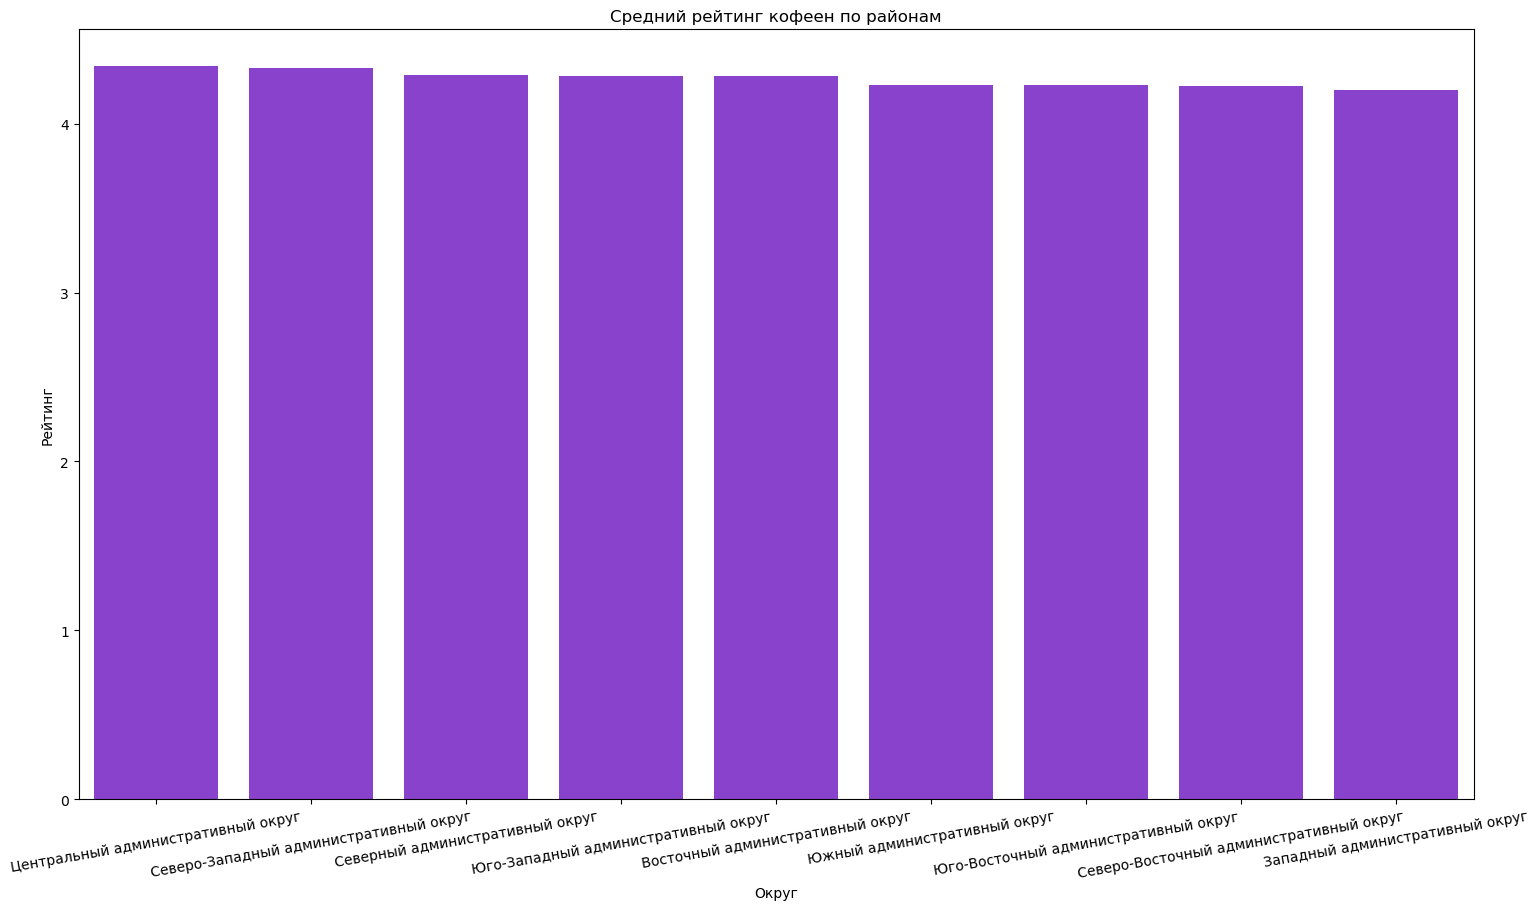

In [88]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='district', y='rating', data=rating_coffee_house, color='blueviolet')
ax.set_title('Cредний рейтинг кофеен по районам')
ax.set_xlabel('Округ')
ax.set_ylabel('Рейтинг')
plt.xticks(rotation=10)

Рейтинги такие же как и в других заведениях

### Посмотрим на какую стоимость чашки капучино стоит ориентироваться при открытии

In [89]:
middle_coffee_cup = coffee_house.groupby('district').agg(middle_coffee_cup=pd.NamedAgg(column="middle_coffee_cup", aggfunc="median")).sort_values(by='middle_coffee_cup', ascending=False).reset_index()
middle_coffee_cup

,district,middle_coffee_cup
0,Юго-Западный административный округ,198.0
1,Центральный административный округ,190.0
2,Западный административный округ,189.0
3,Северо-Западный административный округ,165.0
4,Северо-Восточный административный округ,162.5
5,Северный административный округ,159.0
6,Южный административный округ,150.0
7,Юго-Восточный административный округ,147.5
8,Восточный административный округ,135.0


Стоимость зависит от района

**Вывод:**

Заказчики не боятся конкуренции, значит стоит рассмотреть открытие кофейни в Центральном административном округе. Это центр, там больше всего заведений, а значит и людей. Так же стоит обратить внимание на Западный административный округ. Средняя оценка заведений там, чуть ниже, чем в других округах. Это значит, что крутых кофеен там не хватает. Средняя стоимость чашки капучино, такая же как и в центре. Не рекомендуется открывать круглосуточную кафейню. Таких практически нет, а значит в этом нет необходимости.

Презентация: https://disk.yandex.ru/i/7s5sF9jmBNKA8w

***